# Assignment07
# Name : Junha Lee
# Student ID : 2017220159
# https://github.com/myosoo/Assisgnment07

# Import packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg as LA

# A set of data $((x_1, y_1),(x_2, y_2), \cdot\cdot\cdot (x_n, y_n))$ is generated

In [2]:
num = 1001
std = 5

# x : x-coordinate data
# y1 : (clean) y-coordinate data
# y2 : (noisy) y-coordinate data

def fun(x):
    f = np.abs(x) * np.sin(x)
    return f

n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-10, 10, num)
y1 = fun(x)
y2 = y1 + nn * std

# Define vandemonde matrix : $\begin{bmatrix}
x_0^0 & x_0^1 & x_0^2 & \cdots & x_0^p \\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^p \\
x_2^0 & x_2^1 & x_2^2 & \cdots & x_2^p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_n^0 & x_n^1 & x_n^2 & \cdots & x_n^p
\end{bmatrix}$

In [3]:
def Vandermonde_Matrix(x, p):
    return np.column_stack(x ** (i) for i in range(p + 1))

### Define theta :
$\Theta = (\mathbf{A}^T\mathbf{A})^\mathbf{-1}\mathbf{A}^T\mathbf{y_2}$

In [4]:
def Theta(A, y2):
    return np.matmul(np.linalg.pinv(A), y2) # theta = pseudo inverse A * y2

# Define approximation model : $\hat{f}(x_n) = \mathbf{A} \cdot \mathbf{\Theta}$

In [5]:
def Approximation_model(A, Theta):
    return np.matmul(A, Theta)

# Define residual : $r_n = y_n - \hat{f}(x_n)$

In [6]:
def residual(app_y):
    return y2 - app_y

# Define error : $\sum_{n=1}^p r_n^2$

In [7]:
def Least_Square_Error(R):
    return LA.norm(R)

# Plot the polynomial curves that fit the noisy data by the least square error with varying $p = 0, 1, 2, 3, \cdot\cdot\cdot 9$

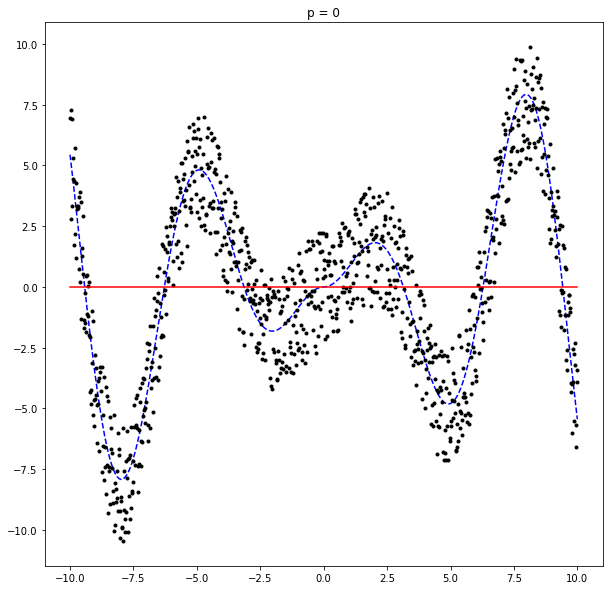

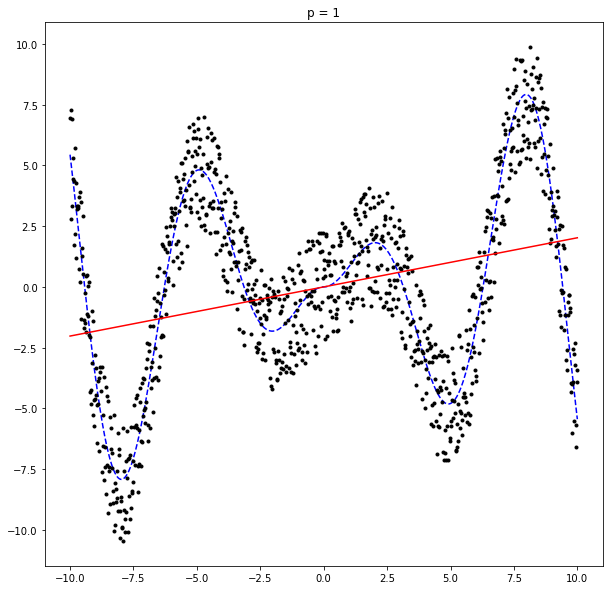

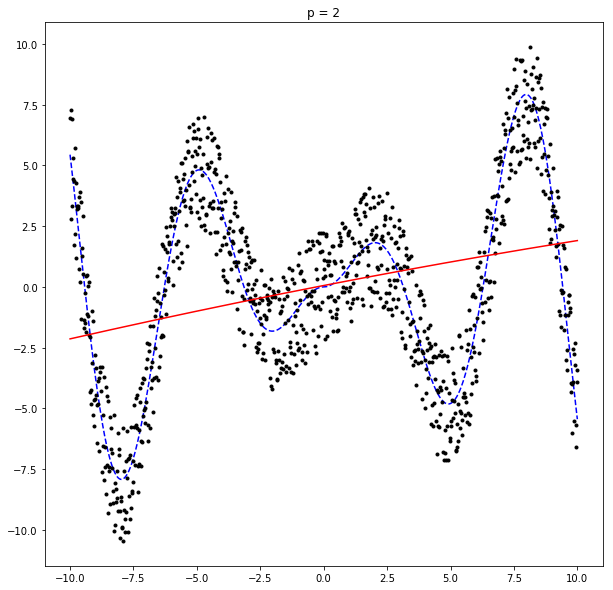

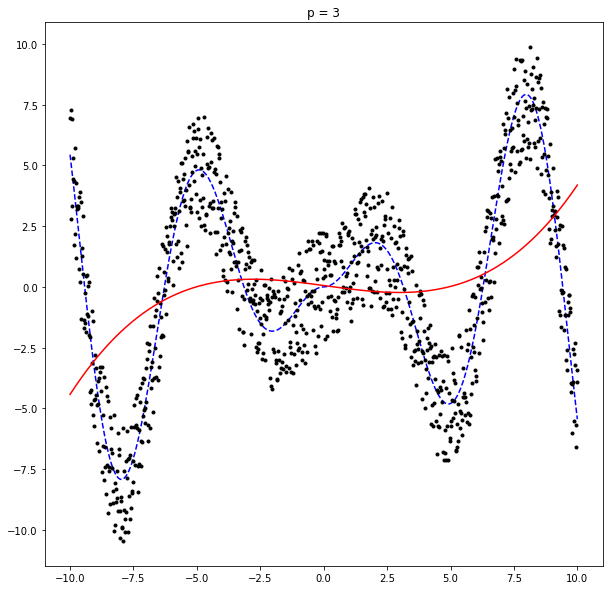

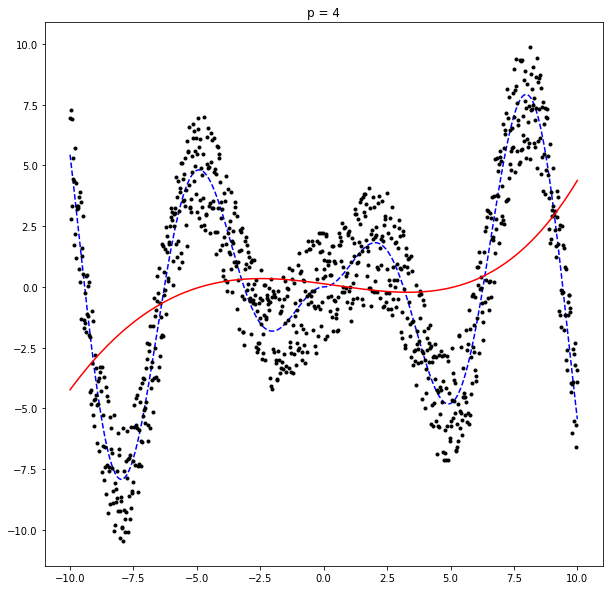

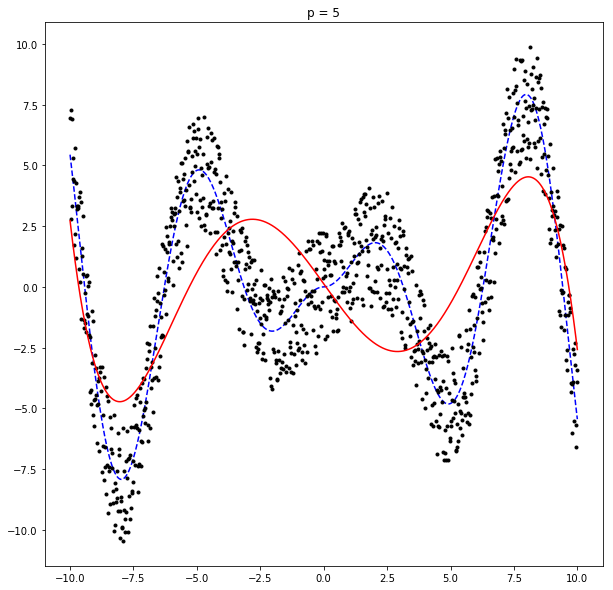

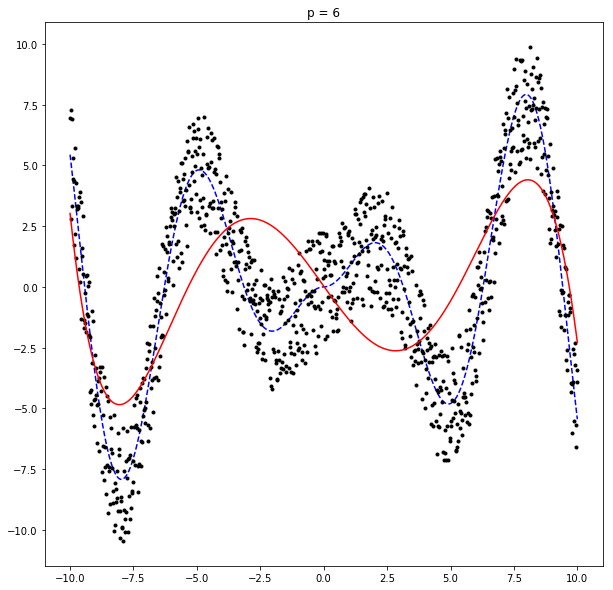

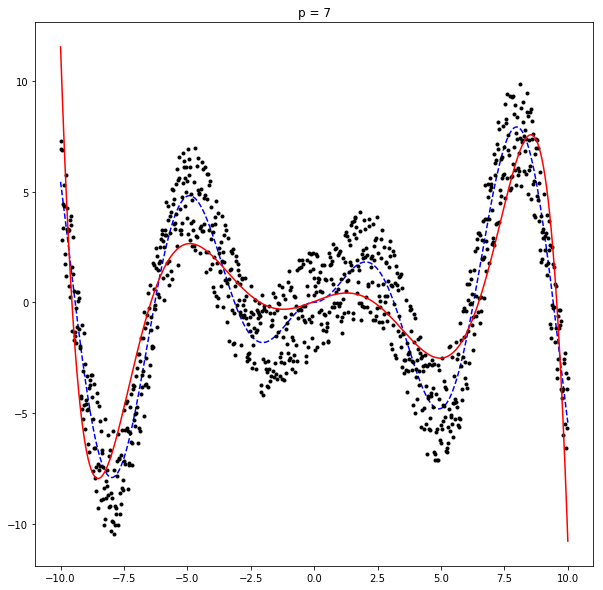

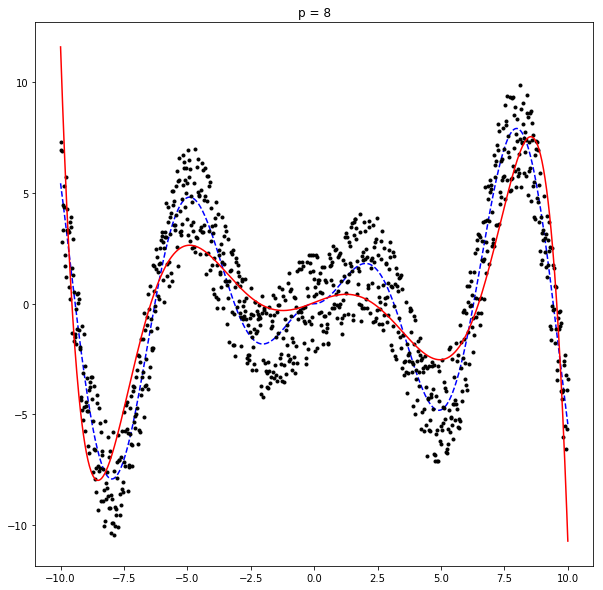

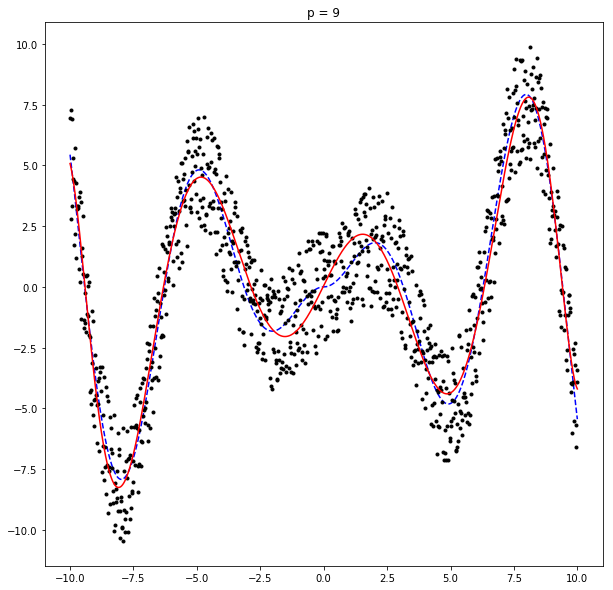

In [8]:
LSE_log = []

for i in range(0, 10):
    A = Vandermonde_Matrix(x, i)
    P = Theta(A, y2)
    app_model = Approximation_model(A, P)
    r = residual(app_model)
    LSE = Least_Square_Error(r)
    LSE_log.append(LSE)
    
    plt.figure(figsize=(10,10))
    plt.title('p = '+ str(i))
    plt.plot(x, y1, 'b--', x, y2, 'k.', x, app_model, 'r-')

# Plot the error $\sum_{n=1}^p r_n^2$ where $r_n = y_n - \hat{f}(x_n)$ is the residual with varying p = 0, 1, 2, 3, · · · 9

In [9]:
LSE_log

[128.44222626686349,
 123.00936784520349,
 122.99841688273993,
 119.89044309047472,
 119.87344041895071,
 99.17612566433765,
 99.1399244369959,
 68.65979416438635,
 68.65778022247315,
 47.53536243489852]

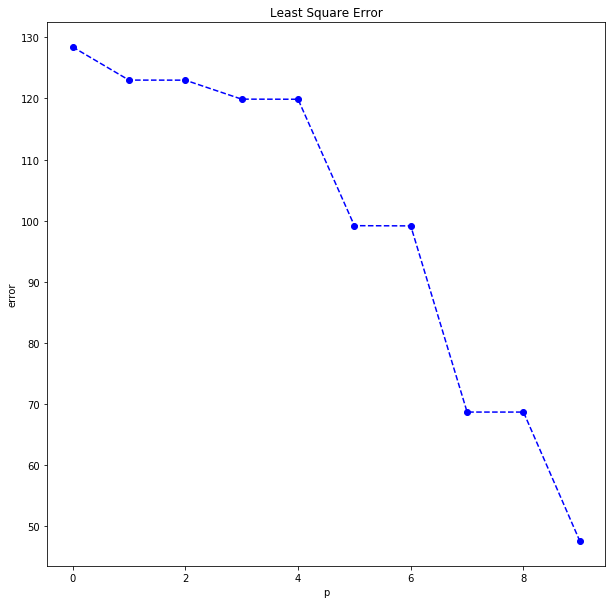

In [10]:
plt.figure(figsize=(10,10))
plt.plot(LSE_log, color = 'b', marker = 'o', linestyle = '--')
plt.xlabel('p')
plt.ylabel('error')
plt.title('Least Square Error')
plt.show()